In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer, BasicAer
from qiskit.tools.monitor import job_monitor
import numpy as np
from scipy.optimize import minimize
from pylab import *
from Ising_n_exact import *
from math import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumregister import AncillaQubit, AncillaRegister


In [2]:
Emin_exact,vec_Emin_exact=groundsate(n=2, h=1)
Psi=vec_Emin_exact
theta = Theta(Psi)
theta.append(0)
theta

[1.570796326794896, 0.7853981633974476, 2.3561944901923444, 0]

In [6]:
# a0 = 1/np.sqrt(3)
# psiS = [a0, a0, a0, 0]
psiS = [0.5]*4
psiS

[0.5, 0.5, 0.5, 0.5]

In [7]:
vec = list(vec_Emin_exact)
vec

[0.6532814824381885,
 0.27059805007309834,
 0.27059805007309856,
 0.653281482438188]

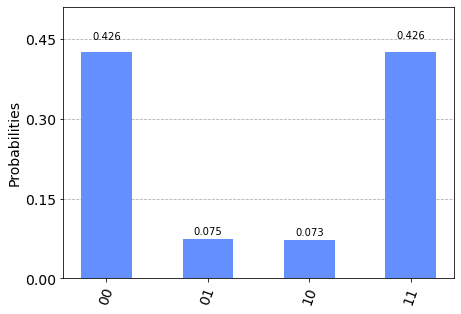

In [8]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.initialize(vec, [q[0],q[1]])
qc.measure(range(2),range(2))
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

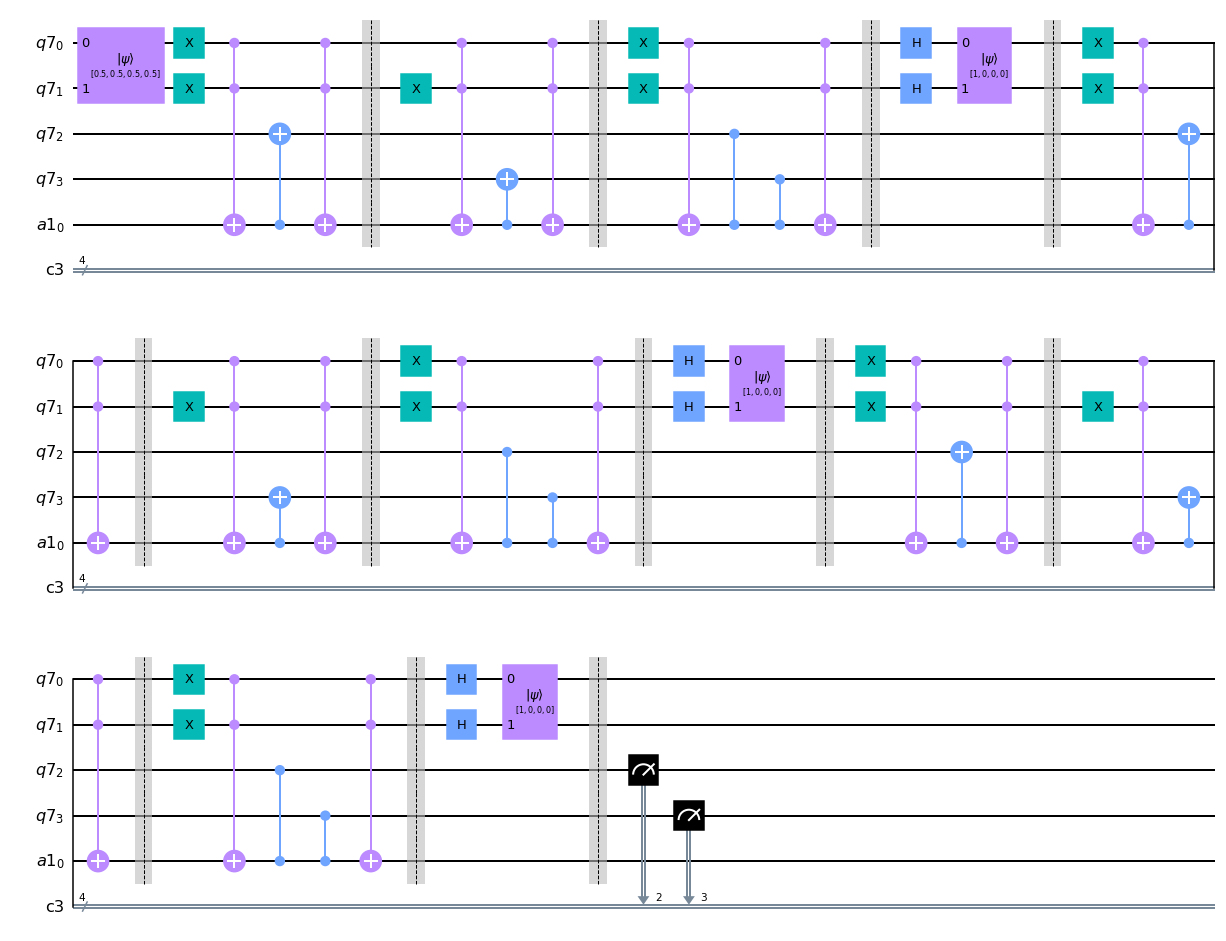

In [9]:
num_shot = 100000
q = QuantumRegister(4)
c = ClassicalRegister(4)
ancreg = AncillaRegister(1)

anc = AncillaQubit(ancreg, 0)
qc = QuantumCircuit(q, c, ancreg)

qc.initialize(psiS, [q[0],q[1]])
#qc.h([2, 3])
#qc.initialize(vec, [q[2], q[3]])
for i in range(0, 3):
    qc.x([0, 1])
    qc.mct([0, 1], anc)
    qc.cx(anc, 2)
    qc.mct([0, 1], anc)
    qc.barrier()
    qc.x(1)
    qc.mct([0, 1], anc)
    qc.cx(anc, 3)
    qc.mct([0, 1], anc)
    qc.barrier()
    qc.x([0, 1])
    qc.mct([0, 1], anc)
    qc.cz(anc, [2, 3])
    qc.mct([0, 1], anc)
    qc.barrier()
    
    qc.h([0, 1])
    qc.initialize([1,0,0,0], [q[0],q[1]])
    qc.barrier()


qc.measure([2, 3], [2, 3])
qc.draw('mpl')

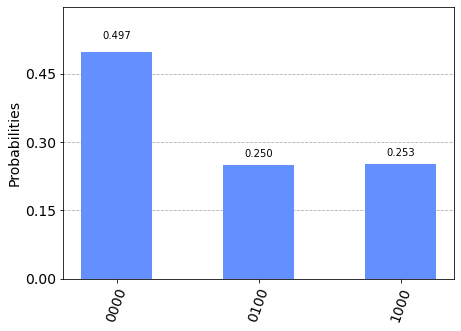

In [10]:
shots = num_shot
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright